# II2202 Quantitative Exercise
## MiaoMiao Liu & Gonzalo Uceda
# 

In [ ]:
#Fix imports hopefully for the rest of our lives.
import sys
!{sys.executable} -m pip install pandas seaborn numpy nbconvert pandoc

## 1. Load data into the analysis tool.

- Load the user testing results and convert it into a Dataframe.
- Drop unnecesary columns: Drop 'feedback' column as it won't be used for the quantitative analysis.

In [2]:
# Read the dataset file.
import pandas as pd
ds=pd.read_csv('./datasets/user_testing_results.csv')
df=pd.DataFrame(ds)

# Drop 'feedback' column as it won't be used for the quantitative analysis.
df = ds.iloc[:, :-1]

## 2. Prepare the data.

##### The dataset is made up of 11 columns:

* Participants' id.
* Reading speeds & Reading comprehension scores for **Experiment 1**: 4 columns
* Reading speeds & Reading comprehension scores for **Experiment 2**: 6 columns

In [3]:
# Print the number of the columns available.
list(df.columns)

['participant',
 'page_speed1',
 'page_score1',
 'page_speed2',
 'page_score2',
 'dynamic_speed1',
 'dynamic_score1',
 'dynamic_speed2',
 'dynamic_score2',
 'dynamic_speed3',
 'dynamic_score3']

In [4]:
# Print first few rows to see how it looks like.
df.head(4)

,participant,page_speed1,page_score1,page_speed2,page_score2,dynamic_speed1,dynamic_score1,dynamic_speed2,dynamic_score2,dynamic_speed3,dynamic_score3
0,1,180,50%,190,25%,180,100%,200,25%,220,25%
1,2,229,75%,230,75%,220,100%,230,100%,240,75%
2,3,204,75%,210,25%,200,50%,210,75%,220,50%
3,4,160,50%,170,25%,160,100%,170,100%,210,100%


In [5]:
# Convert the percentages into floating integers between (0,100).
def p2f(x):
    return x.str.strip('%').astype(int);

# Find all columns that contain score in the name.
score_cols = [col for col in df.columns if 'score' in col]

# Convert percentages to number.
formated_scores = df[score_cols].apply(lambda x: p2f(x))

# Replace columns in the original df.
df.drop(labels=score_cols, axis="columns", inplace=True)
df[score_cols] = formated_scores[score_cols]

In [6]:
# Print new dataframe to see if the transformation worked as expected.
df

,participant,page_speed1,page_speed2,dynamic_speed1,dynamic_speed2,dynamic_speed3,page_score1,page_score2,dynamic_score1,dynamic_score2,dynamic_score3
0,1,180,190,180,200,220,50,25,100,25,25
1,2,229,230,220,230,240,75,75,100,100,75
2,3,204,210,200,210,220,75,25,50,75,50
3,4,160,170,160,170,210,50,25,100,100,100
4,5,152,169,160,180,190,100,75,75,50,75
5,6,268,195,250,300,330,25,100,100,100,100
6,7,145,180,200,230,250,75,75,100,75,75
7,8,170,220,230,260,270,50,25,75,100,25
8,9,150,170,190,220,240,100,100,75,100,100


In [7]:
# Check if new types are the right ones
df.dtypes

participant       int64
page_speed1       int64
page_speed2       int64
dynamic_speed1    int64
dynamic_speed2    int64
dynamic_speed3    int64
page_score1       int64
page_score2       int64
dynamic_score1    int64
dynamic_score2    int64
dynamic_score3    int64
dtype: object

## 3. Describe the data.

In [8]:
# Get description
df.describe()

,participant,page_speed1,page_speed2,dynamic_speed1,dynamic_speed2,dynamic_speed3,page_score1,page_score2,dynamic_score1,dynamic_score2,dynamic_score3
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,184.222222,192.666667,198.888889,222.222222,241.111111,66.666667,58.333333,86.111111,80.555556,69.444444
std,2.738613,41.787491,22.918333,30.595933,39.930495,40.756731,25.000000,33.071891,18.162079,27.322661,30.046261
min,1.000000,145.000000,169.000000,160.000000,170.000000,190.000000,25.000000,25.000000,50.000000,25.000000,25.000000
25%,3.000000,152.000000,170.000000,180.000000,200.000000,220.000000,50.000000,25.000000,75.000000,75.000000,50.000000
50%,5.000000,170.000000,190.000000,200.000000,220.000000,240.000000,75.000000,75.000000,100.000000,100.000000,75.000000
75%,7.000000,204.000000,210.000000,220.000000,230.000000,250.000000,75.000000,75.000000,100.000000,100.000000,100.000000
max,9.000000,268.000000,230.000000,250.000000,300.000000,330.000000,100.000000,100.000000,100.000000,100.000000,100.000000


The table above shows basic statistics for each of the columns. The one that correspond to the participants' id 'participant' can be ignored since it do not provide any information.

From this first approach we can draw quite a few conclusions. We see on the one hand that the averages of the read speed measurements in page format (~ 184 WPM, ~ 192 WPM) are lower than those taken using the web application (~ 198 WPM, ~ 222 WPM, ~ 241 WPM). It can also be seen that the level of understanding is also higher in the dynamic reading even working at higher speeds. For reading in page format and with the speeds mentioned above, comprehension levels are ~ 66 and ~ 58 out of 100, while the web application yields higher values: ~ 86, ~ 80 and ~ 69. This leads us to conclude that, although dynamic reading is more efficient both with respect to speed and comprehension, the last test that was conducted, in which speeds as high as 300 WPM were tested, collected lower comprehension rates than the previous ones, marking perhaps  the limit in which the increase in speed implies a loss of understanding. 
We will discuss this assumption in more detail later.

## 4. Understand the data

In [9]:
# Import required libraries
import seaborn as sns

In [10]:
# Load new dataset and conver it to DataFrame.
ds2=pd.read_csv('./datasets/user_testing_results_formatted.csv')
df2=pd.DataFrame(ds2)


### 4.1 Aggregated data by participant
Not enough data to present now

In [11]:
#user1_df = df2.loc[df2['participant'] == 1]
#sns.lineplot(data=user1_df, x="speed", y="comprehension", hue="type")

In [12]:
#user2_df = df2.loc[df2['participant'] == 2]
#sns.lineplot(data=user2_df, x="speed", y="comprehension", hue="type")

In [13]:
#user3_df = df2.loc[df2['participant'] == 3]
#sns.lineplot(data=user3_df, x="speed", y="comprehension", hue="type")

In [14]:
#user4_df = df2.loc[df2['participant'] == 4]
#sns.lineplot(data=user4_df, x="speed", y="comprehension", hue="type")

In [15]:
#user5_df = df2.loc[df2['participant'] == 5]
#sns.lineplot(data=user5_df, x="speed", y="comprehension", hue="type")

In [16]:
#user6_df = df2.loc[df2['participant'] == 6]
#sns.lineplot(data=user6_df, x="speed", y="comprehension", hue="type")

In [17]:
#user7_df = df2.loc[df2['participant'] == 7]
#sns.lineplot(data=user7_df, x="speed", y="comprehension", hue="type")

In [18]:
#user8_df = df2.loc[df2['participant'] == 8]
#sns.lineplot(data=user8_df, x="speed", y="comprehension", hue="type")

In [19]:
#user9_df = df2.loc[df2['participant'] == 9]
#sns.lineplot(data=user9_df, x="speed", y="comprehension", hue="type")

### 4.2 Invidual data

The goal of this section is to understand whether reading comprehension and speed increase when using the dynamic reading tool.

In order to be able to visualize the measurements easier, we are going to load a different dataset with the data organized by measures instead of by users.

In [20]:
# Preview
df2.head()

,speed,type,participant,comprehension,experiment
0,180,page,1,50,1
1,190,page,1,25,2
2,180,dynamic,1,100,3
3,200,dynamic,1,25,4
4,220,dynamic,1,25,5


In [21]:
# Scatter plot
#sns.scatterplot(data=df2, x="speed", y="comprehension", hue="type")
#sns.histplot(data=df2, x="comprehension", y="speed", hue="type")

<AxesSubplot:xlabel='type', ylabel='speed'>

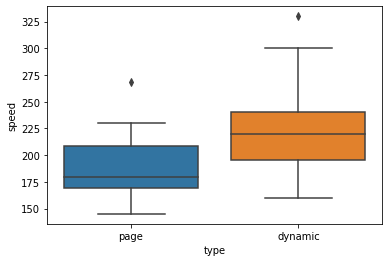

In [22]:
# Represent speed by techonology
sns.boxplot(x="type", y="speed", data=df2)

This graph represents the reading speeds in WPM achieved with both methods. As we can see, presenting the text in a dynamic way allows reaching higher speeds. However, the dispersion of the values is much greater as well. This could be due to ease or difficulty of adaptation to the reading tool.

<AxesSubplot:xlabel='type', ylabel='comprehension'>

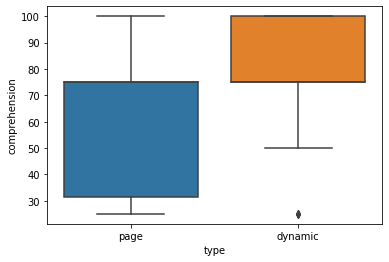

In [23]:
# Represent comprehension by techonology
sns.boxplot(x="type", y="comprehension", data=df2)

Comprehension is also higher using the dynamic reading tool, as shown in the graphic above.

In [24]:
#static_df = df2.loc[df2['type'] == 'page']
#sns.lineplot(data=static_df, x="speed", y="comprehension")

In [25]:
#dynamic_df = df2.loc[df2['type'] == 'dynamic']
#sns.lineplot(data=dynamic_df, x="speed", y="comprehension")

In [26]:
#The goal of these charts was to draw conclusions about the correlation between speed (independent variable) and #comprehension (dependent variable) for each of the methods, however, the amount and dispersion of the data does #not allow us to reach any result.

### 4.3. ANOVA

#### Goal
* Test the **homogeneity** of variances in order to know if the variances are homogenous
* Test the **significance of the difference** of participants' reading speeds and, therefore, their reading abilities
* Present and compare the differences 

#### Differences of reading abilities

* To examine whether there are differences in terms of **reading ability** among participants, differences among users’ reading speeds on the dynamic reading website were assessed with **ANOVA (Analysis of variance)**.
* As we can see from **Test of Homogeneity of Varirances**, the significance of comprehension_socres is **0.051 >0.05** and the significance of reading_rates is **0.028>0.05**, which means the variances of both reading_rates and comprehension_scores are homogeneous and the **ANOVA results are valid**.



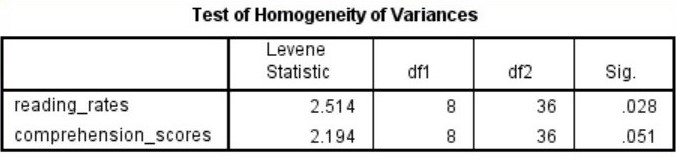

* From ANOVA test,  the significance of reading_rates is **0.000<0.005**, which means that participants have **significant difference** in regard to reading speeds.
* The significance of comprehension_scores is **0.48>0.005**, which means that the data **does not show significant difference** regarding reading comprehensions among participants.

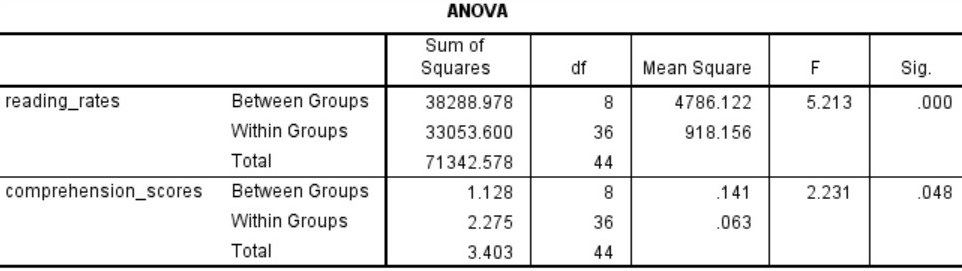

## 4.4 Average reading speed by participant

According to the mean plot of the reading speeds, we came to the conclusion that our participants have significant differences in their reading abilities, with participant number 6 scoring the highest.

<AxesSubplot:xlabel='participant', ylabel='mean_WPM'>

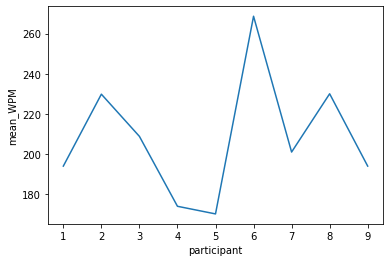

In [27]:
participants =df['participant'].unique()

means = {}
for i in participants:
    participant = df2.loc[df2['participant'] == i]
    means[i] = [participant.speed.sum() / len(participant.speed)]

means_df = pd.DataFrame(means).transpose()
means_df = means_df.rename(columns={0: 'mean_WPM'})
means_df['participant'] = means_df.index
sns.lineplot(data=means_df, x='participant', y='mean_WPM')


## Conclusion

The differences in performance between the two experiments seem clear, both in terms of reading speed and comprehension. As WPM increases, there is a considerable loss of performance in ordinary reading. Although this inverse correlation is also maintained by reading dynamically, the speeds achieved with this technique are higher and with less loss of understanding. 
As an exception, participants 1 and 5 obtained a higher level of comprehension when reading in page format.



## Peer Review
The peer review has been made by *Christoph Albert Johns*. 
Charts that were not very intuitive have been replaced and the document has been modified taking into account his suggestions.